# Retail Price Optimization

Introduction:

Retail price optimization is a strategic process aimed at maximizing profits for retailers by determining the most effective price points for their products. The primary objective is to strike a balance between attracting customers, driving sales, and maximizing profit margins. This involves analyzing various factors such as competitor pricing, customer segmentation, and price testing.

Competitor analysis plays a crucial role in understanding the pricing landscape. By monitoring the prices of similar products offered by competitors, retailers can make informed decisions about adjusting their own prices to remain competitive in the market.

Customer segmentation involves dividing customers into distinct groups based on their buying behavior, preferences, and demographics. This segmentation allows retailers to tailor prices and marketing strategies to different customer segments, maximizing the effectiveness of pricing strategies.

Price testing involves experimenting with different price points to determine the optimal price that maximizes profits. Through rigorous testing and analysis, retailers can identify price points that attract customers while maintaining healthy profit margins.

Successful retail price optimization requires a deep understanding of customer behavior, market trends, and pricing strategies. It involves collecting and analyzing data on sales and pricing to uncover insights that drive informed decision-making.

By optimizing prices effectively, retailers can gain a significant competitive advantage in the marketplace. They can increase profits, improve competitiveness, and provide customers with products at fair and reasonable prices, ultimately leading to long-term success and sustainability.


## Let's get Start

### Outline

In this Project we will go through the following steps:

## A. Loading data & Exploratory Data Analysis

  1. Data Collection and Preprocessing.

  2. Analysis of Sales Trends Over Time.

  3. Identification of Top-Selling Products and Categories.

  4. Exploration of Correlations Between Sales and External Factors.

  5. Visualization of Findings Using Charts, Graphs, and Heatmaps.

## B. Feature Engineering

  1. Aggregating the dataframes separately
  2. Join the dataframes
  3. Features and Target

## C. Model Building

  - Evaluate the model
  - Visualizing Results

## D. Model Explainability

  - Permutation Importance
  - Predictions with Largest and Smallest Error
  - SHAP Values

## E. Conclusion

## A. Loading Data & Exploratory Data Analysis

### 1. Data Collection and Preprocessing

In [42]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a576fa1780673b35ac2eaf12644726e7ff57e68c8388574e642d948904bdf7c1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [44]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.1 MB/s eta 0:00:00


In [45]:
# Import Libraries

#Data Processing
import pandas as pd
import numpy as np

#Data Visulaisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

#model implementation
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import eli5 # explain individual predictions by showing the contribution of each feature to the model's output
from eli5.sklearn import PermutationImportance
import shap # visualization tools to interpret feature importance, summary plots, and dependence plots.S

In [2]:
#Load the data
from google.colab import files
files.upload()

Saving retail_price.csv to retail_price.csv


{'retail_price.csv': b'product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price\r\nbed1,bed_bath_table,01-05-2017,1,45.95,15.1,45.95,39,161,2,350,4,57,23,8,1,5,2017,10.26739356,3800,89.9,3.9,15.01189655,215,4.4,8.76,45.95,4,15.1,45.9\r\nbed1,bed_bath_table,01-06-2017,3,137.85,12.93333333,45.95,39,161,2,350,4,61,22,8,1,6,2017,6.503115265,3800,89.9,3.9,14.76921569,209,4.4,21.322,45.95,4,12.93333333,45.95\r\nbed1,bed_bath_table,01-07-2017,6,275.7,14.84,45.95,39,161,2,350,4,123,21,10,1,7,2017,12.07165109,3800,89.9,3.9,13.99383333,205,4.4,22.1959322,45.95,4,14.84,45.95\r\nbed1,bed_bath_table,01-08-2017,4,183.8,14.2875,45.95,39,161,2,350,4,90,23,8,1,8,2017,9.293873313,3800,89.9,3.9,14.65675676,199.5098039,4.4,19.41288462,45.95,4,14.2875,45.95\r\nbed1,bed_bath_ta

In [3]:
# Load the dataset and assign a variable to it
data = pd.read_csv("retail_price.csv")

In [4]:
# Let's have a look to the first 10 rows of our data
data.head(10)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


In [6]:
#Shape of the Dataset
print(f"Columns: {data.shape[1]}\nSamples: {data.shape[0]}")

Columns: 30
Samples: 676


In [5]:
# Data preprocessing
# Check for missing values
print(data.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [7]:
#Some Stats ...
data.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [8]:
# Convert categorical variables to appropriate data type
data['month_year'] = pd.to_datetime(data['month_year'])

### 2. Analysis of Sales Trends Over Time.

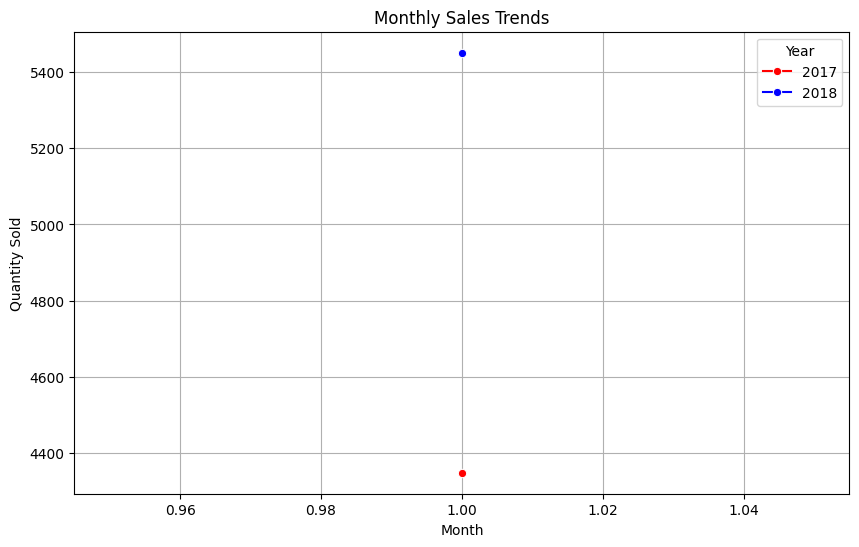

In [20]:
# Analysis of sales trends over time
# Extract 'month' and 'year' from 'month_year' column
data['month'] = data['month_year'].dt.month
data['year'] = data['month_year'].dt.year

# Group by 'year' and 'month', and aggregate sales data
monthly_sales = data.groupby(['year', 'month']).agg({'qty': 'sum'}).reset_index()

# Plotting the sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='qty', hue='year', palette=['red', 'blue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Year')
plt.grid(True)
plt.show()

### 3. Identification of Top-Selling Products and Categories.

In [10]:
# Identification of top-selling products and categories
top_products = data.groupby('product_id').agg({'qty': 'sum', 'total_price': 'sum'}).sort_values(by='qty', ascending=False).head(10)
top_categories = data.groupby('product_category_name').agg({'qty': 'sum', 'total_price': 'sum'}).sort_values(by='qty', ascending=False).head(10)


### Visualization of Findings Using Charts, Graphs, and Heatmaps.

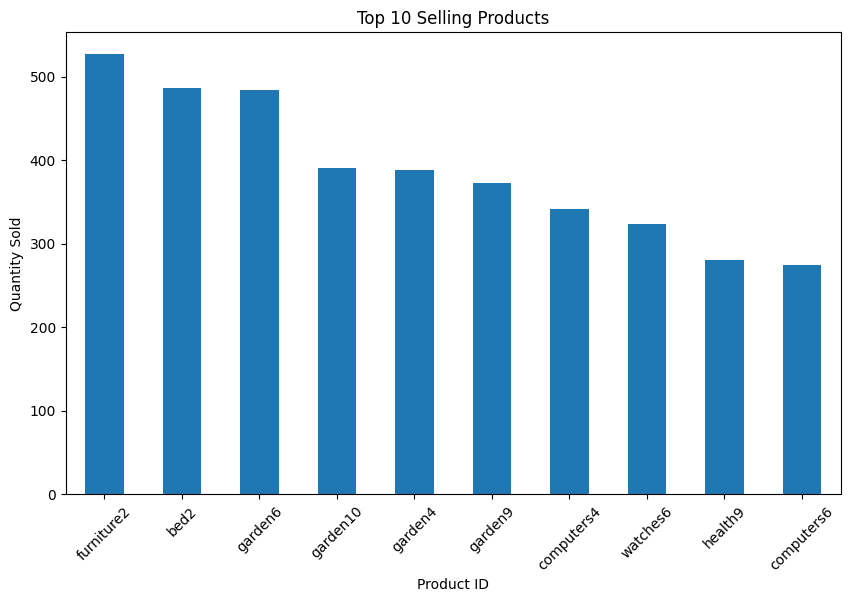

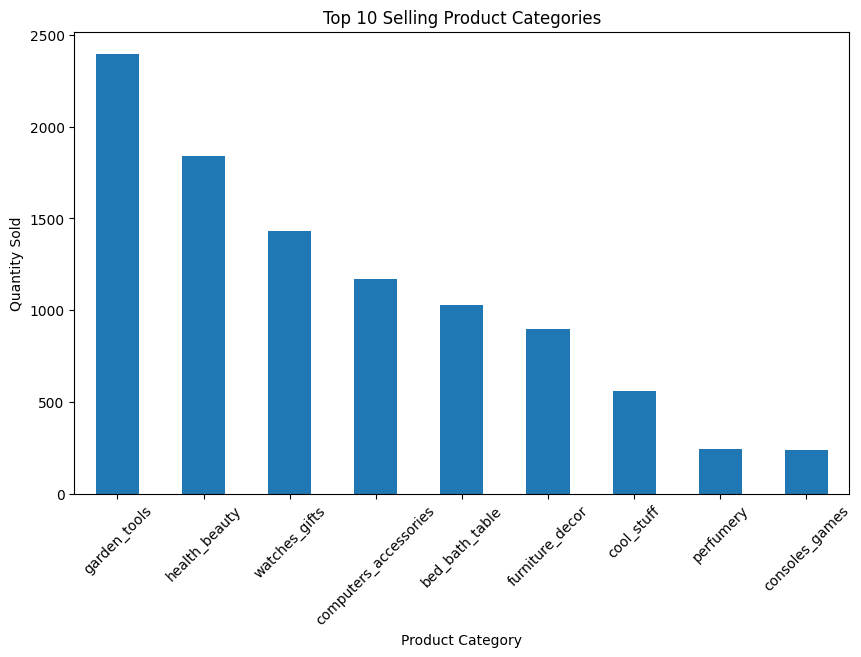

In [11]:
# Visualization of top-selling products and categories
plt.figure(figsize=(10, 6))
top_products['qty'].plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
top_categories['qty'].plot(kind='bar')
plt.title('Top 10 Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [22]:

fig = px.box(data,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [24]:
fig = px.scatter(data,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

In [25]:
fig = px.box(data, x='weekday',
             y='total_price',
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [26]:
fig = px.box(data, x='weekend',
             y='total_price',
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

**Comparison with Competitor Products**

As mentioned previously, competitor analysis is quite essential. Therefore, we compare the unit and shipping prices of every product to those of 3 different competitors.


For this, we simply calculate the difference between each pair

In [27]:
data['comp1_diff'] = data['unit_price'] - data['comp_1']
data['comp2_diff'] = data['unit_price'] - data['comp_2']
data['comp3_diff'] = data['unit_price'] - data['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'],
                 y=data[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

** Freight Price**

In [28]:
data['fp1_diff'] = data['freight_price'] - data['fp1']
data['fp2_diff'] = data['freight_price'] - data['fp2']
data['fp3_diff'] = data['freight_price'] - data['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'],
                 y=data[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

 **Correlation Analysis with Unit Price**

In [29]:
corrs = data.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

**Month-wise Sales Analysis**

This dataset includes features that are temporal in nature. The attributes of each product (sales, quantity, etc) are shown over a span of several months. Hence, we take a look at this data aggregated across time.

In [30]:
monthly_df = data.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [31]:
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
1,2017-01-02,127.827143,3584.11,217.847838,35,180,72,78
2,2017-01-03,122.586615,10204.38,282.314965,101,299,104,242
3,2017-01-04,119.288667,11524.62,335.440132,121,300,150,309
4,2017-01-05,104.785769,21843.33,393.828633,222,460,160,803


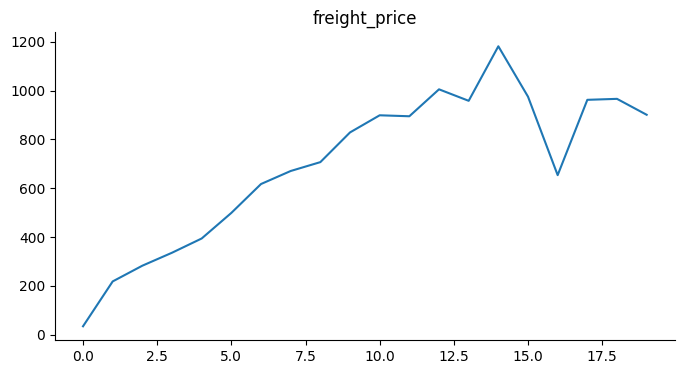

In [36]:

monthly_df['freight_price'].plot(kind='line', figsize=(8, 4), title='freight_price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [32]:
fig = px.scatter(monthly_df,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

In [33]:
fig = px.scatter(monthly_df,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

In [34]:
fig = px.bar(monthly_df,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

### 5. Exploration of Correlations Between Sales and External Factors.

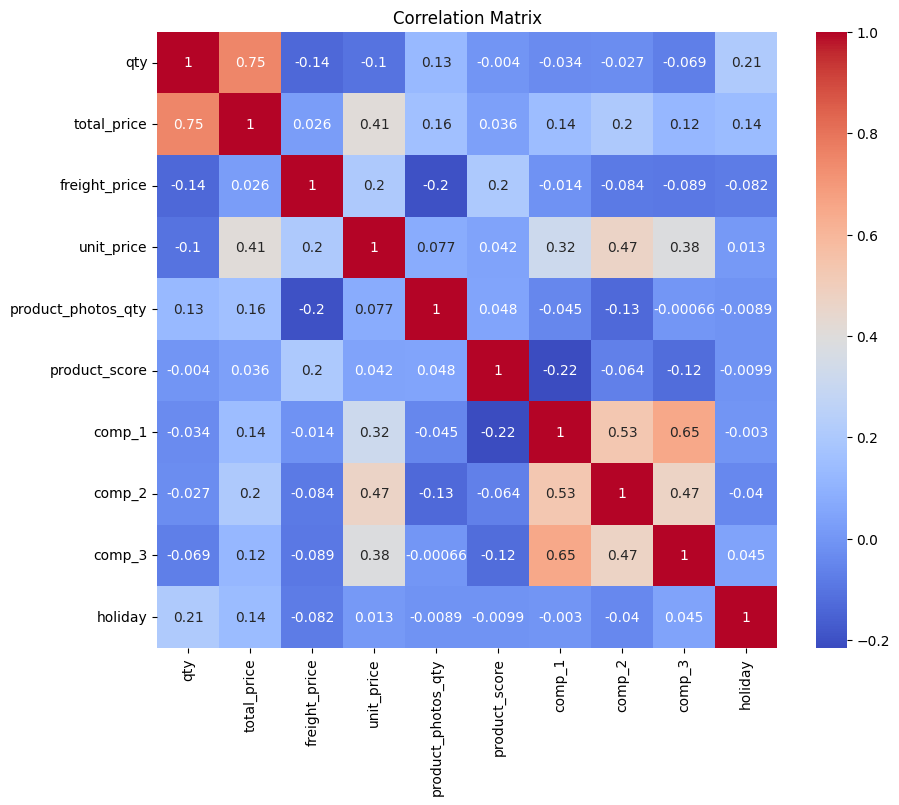

In [12]:
# Exploration of correlations between sales and external factors
correlation_matrix = data[['qty', 'total_price', 'freight_price', 'unit_price', 'product_photos_qty', 'product_score', 'comp_1', 'comp_2', 'comp_3', 'holiday']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## B. Feature Engineering


### 1. Creating an aggregated dataframe by products

Since the data involves recurring products across months, we create an aggregated dataframe to proceed with the problem. This is because we will be using Regression Analysis. Some of the features get dropped based on the Correlation Analysis results. With the remaining

  - Features like total_price, number of customers are aggregated by their sum
  - Others, such as competitor differences, product score, unit price, are all aggregated by thier mean

In [37]:
cols_to_mean = ['product_id', 'month_year', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']
mean_df = data[cols_to_mean]
sum_df = data[cols_to_sum]

### 2. Aggregating the dataframes separately, based on type

In [38]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

### 3. Join the dataframes

In [39]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703


### 4. Features and Target

In [40]:
X, y = products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']

## C. Model Building

Retail price optimization can be tackled as a regression problem, where the objective is to predict the optimal price for a given product, based on various factors such as product features, competitor prices, and customer behavior. Regression is a statistical technique used to analyze the relationship between two or more variables. It is commonly used to predict a dependent variable based on one or more independent variables, by modeling the relationship between them. The basic idea behind regression is to find the line or curve that best fits the data, so that we can use it to make predictions for new data points.

Here we are making use of RandomForestRegressor, a popular regression technique based on the Bagging method of Ensemble learning, Random Forest.

Note: The goal here is not to build the best model, but to highlight how this problem can be solved, and further deriving some business value through this solution, which will be done in a later section.

Anyways, onto the model

In [46]:
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)

### 1. Evaluate the model

In [47]:
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9653993851444929


In [48]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 10.038151266352664


### 2. Visualizing Results

In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

## D. Model Explainability

As a data scientist, the job simply doesn't end with building a Machine Learning model that gives the best metrics. The main idea is to derive insights that can help a business or organization improve further. This is where Machine Learning Model explainability comes in.

Model explainability is the ability to understand and interpret how a machine learning model arrives at its predictions or decisions. It is an important aspect of machine learning, especially in applications where the stakes are high, such as healthcare or finance, where decisions made by the model can have significant consequences. Explainability allows us to understand the reasoning behind a model's predictions, and helps to build trust and confidence in the model. It also helps to identify any biases or errors in the model, which can be corrected or improved to enhance the model's performance.

One important feature of Model explainability is that it can help understand how the involved features are helping the model get better- or worse. These features are raw and collected from real world scenarios, so it is important to understand how they are affecting the model's predictions. Each feature brings a certain value, positive or negative, and sometimes, both are important in building an unbiased, generalized model. These insights are simplified, so that they can be explained to the non-technical audience involved in the process.

**Techniques for Model Explainability**

  - Permutation Importance
  - SHAP (SHapley Additive exPlanations)
  - SHAP summary plot

### Permutation Importance
Permutation importance is a technique for measuring the importance of features in a machine learning model. It works by shuffling the values of a single feature in the test set and measuring the decrease in performance of the model. The idea behind this is that a feature which is important for the model's prediction should have a greater impact on the model's performance when its values are randomly permuted.

In [50]:
perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.3651 ± 0.0787,total_price
0.2193 ± 0.0345,comp1_diff
0.2063 ± 0.0817,comp2_diff
0.0590 ± 0.0278,customers
0.0263 ± 0.0145,comp3_diff
0.0104 ± 0.0029,product_score
0.0091 ± 0.0023,fp1_diff
0.0076 ± 0.0034,freight_price
0.0073 ± 0.0039,fp3_diff
0.0041 ± 0.0026,fp2_diff


### Predictions with Largest and Smallest Error
Using SHAP values to analyze what made the best prediction, the best, and the worst one, the worst. SHAP values break down a prediction to show the impact of each feature. This can help see the effects of each feature on a single prediction. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

**Note**: SHAP values do not provide **Causality**

In [51]:
products['unit_price_pred'] = y_pred
products['error'] = abs(products['unit_price'] - products['unit_price_pred'])
products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price,unit_price_pred,error
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989,42.489737,0.277748
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536,103.087462,16.312926
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364,98.837131,6.735767
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444,44.375751,2.349694
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703,185.783795,12.597908


In [52]:
max(products['error']), min(products['error'])

(42.57551522760048, 0.27774801323548104)

In [53]:
largest_error = products[products['error'] == max(products['error'])].drop(['product_id'], axis=1)
smallest_error = products[products['error'] == min(products['error'])].drop(['product_id'], axis=1)

### SHARP value

In [54]:
data_for_prediction = largest_error
print("-------------------- LARGEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

-------------------- LARGEST ERROR PREDICTION --------------------




In [55]:
data_for_prediction = smallest_error
print("-------------------- SMALLEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

-------------------- SMALLEST ERROR PREDICTION --------------------




Inferences
  - The **base value** (AKA expected value) is the average of the model output over the training data
  - In the first plot, we can see the prediction was much higher than the base value. The Competitor Differences were the major factors that led to such a high prediction. Among these, comp_diff_1 had the highest impact. The competitor difference is high, and positive, which means that the competitors are selling for much lower and the total price is quite low. This is why the model predicts a high value, so that the product does not contribute to a loss for the retailer.
  - In the second plot, the prediction was much lower than the base value. The competitor difference is negative (indicating that the competitors were selling at higher prices) and a high value of total_price is the major contributor. This explains why the model predicted a much lower value. Because the product is already being sold at a lower price compared to the competitors and with such a high value for total price means the optimal price is fairly low.

**SHAP Summary Plot**

A SHAP (SHapley Additive exPlanations) summary plot is a type of visualization that shows the impact of different features on the output of a machine learning model. It is particularly useful for regression problems, where the goal is to predict a continuous output variable based on one or more input variables.

The basic idea behind a SHAP summary plot is to display the average impact of each input feature on the model's prediction, across all instances in the dataset. The plot shows a horizontal bar for each feature, with the length of the bar representing the magnitude of the feature's impact on the output. Features that have a positive impact are shown in blue, while those that have a negative impact are shown in red.

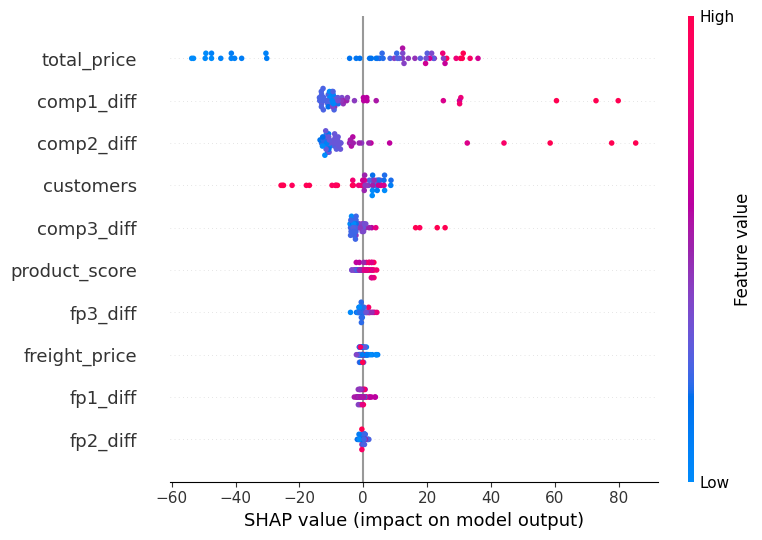

In [56]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

## E. Conclusion
The ultimate aim of optimizing retail prices is to charge a price that helps you make the most money and attracts enough customers to buy your products. It involves using data and pricing strategies to find the right price that maximizes your sales and profits while keeping customers happy.